# Forecast the demand for electrical energy in a household based on the Kaggle platform's database 'Household power consumption'

<img src="https://uprawnienia-budowlane.com/wp-content/uploads/2019/05/w%C5%82asne-energia-dla-domu.jpg" alt="Alt text" title="Title text" width="200" height="100">

<b>Contributors:</b><br>
Joanna Zielińska <br>
Marcin Sidoruk<br>
Dominika Gerszewska<br>
Andrzej Łososowski<br>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option.max_columns = 60
import xgboost as xgb

# Project purpose

The dataset "house power consumption" contains data on the electric power usage of a single household, with measurements taken every minute over a period of nearly four years.<br> The dataset includes various electrical measurements, as well as sub-metering values.

The attribute information for this dataset includes:

- Date: The date in the format dd/mm/yyyy
- Time: The time in the format hh:mm:ss
- Global_active_power: The household's global active power, averaged over one minute (in kilowatts).
- Global_reactive_power: The household's global reactive power, averaged over one minute (in kilowatts).
- Voltage: The minute-averaged voltage (in volts).
- Global_intensity: The household's global current intensity, averaged over one minute (in amperes).
- Sub_metering_1: The first energy sub-metering value (in watt-hours of active energy). This sub-meter corresponds to the kitchen, which mainly contains a dishwasher, oven, and microwave (with gas-powered hot plates).
- Sub_metering_2: The second energy sub-metering value (in watt-hours of active energy). This sub-meter corresponds to the laundry room, which contains a washing machine, tumble dryer, refrigerator, and light.
- Sub_metering_3: The third energy sub-metering value (in watt-hours of active energy). This sub-meter corresponds to an electric water heater and air conditioner.


The aim of the project is to forecast the demand for electrical energy in a household.<br>
The XGBoost model has been used in the project.

Source: https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set

# Exploratory data analysis of household power consumption

Exploratory Data Analysis (EDA) is the process of investigating, analyzing, and understanding datasets before subjecting them to further analysis or modeling. Its aim is to discover characteristics and patterns in the data, identify errors and anomalies, detect relationships between variables, and select appropriate data analysis techniques.
- Problem Understanding
- Data Acquisition
- Data Familiarization and Preliminary Issue Identification
- Data Cleaning and Preprocessing
- Univariate Analysis
- Multivariate Analysis
- Further Data Cleaning and Preprocessing (if necessary)

In [2]:
# Data acquisition

In [3]:
df = pd.read_csv("household_power_consumption.csv", sep=";", dtype="unicode")

# Data familiarization and preliminary issue identification

## Checking the size of the dataset

In [4]:
num_of_columns = df.shape[1]
print("Number of columns:", num_of_columns)
num_of_rows = df.shape[0]
print("Number of rows:", num_of_rows)

Number of columns: 9
Number of rows: 2075259


## First 5 rows of the dataset

In [5]:
df.head(5)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


## Last 5 rows of the dataset

In [6]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.000


## Checking for missing values 

In [7]:
df.isna().values.any()

True

In [8]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

## Checking for missing values in columns, determining the number of missing values, and calculating the percentage of missing values in each column.

In [9]:
nulls_summary = pd.DataFrame(df.isnull().any(), columns=["Nulls"])
nulls_summary["Number of nulls"] = pd.DataFrame(df.isnull().sum())
nulls_summary["Number of nulls [%]"] = round((df.isnull().mean() * 100), 4)
nulls_summary

,Nulls,Number of nulls,Number of nulls [%]
Date,False,0,0.00
Time,False,0,0.00
Global_active_power,False,0,0.00
Global_reactive_power,False,0,0.00
Voltage,False,0,0.00
Global_intensity,False,0,0.00
Sub_metering_1,False,0,0.00
Sub_metering_2,False,0,0.00
Sub_metering_3,True,25979,1.25


## Finding NaN values

In [10]:
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


# Data cleaning and preprocessing

#### Changing data types and removing NaN values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Date                   object
 1   Time                   object
 2   Global_active_power    object
 3   Global_reactive_power  object
 4   Voltage                object
 5   Global_intensity       object
 6   Sub_metering_1         object
 7   Sub_metering_2         object
 8   Sub_metering_3         object
dtypes: object(9)
memory usage: 142.5+ MB


In [12]:
df.replace("?", np.nan, inplace=True)

In [13]:
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,28/9/2010,19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,28/9/2010,19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,28/9/2010,19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 314009 row was not filled in because the value from the previous week was not filled in.  It had to be filled in first, so the loop needs to be run again to retrieve the value from the previous week.

In [14]:
columns = df.iloc[:, 2:].columns
for i in columns:
    df[i] = round(df[i].astype("float64"), 2)

In [15]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].shift(10080))

In [16]:
df[df.isna().any(axis=1)]

# 314009 was not filled in because the value from the previous week was not filled in. 
# It had to be filled in first, so the loop needs to be run again to retrieve the value from the previous week.

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314009,22/7/2007,18:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].shift(10080))

### The two values that remain have no counterpart a week earlier, so we will replace them with the values from a week later.

In [18]:
df[
    df.isna().any(axis=1)
]  # The two values that remain have no counterpart a week earlier, so we will replace them with the values from a week later.

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].shift(-10080))

### Checking for NaN values

In [20]:
df.isna().any()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
dtype: bool

In [21]:
#### Creating variables for the XGBoost model

In [22]:
df["timestamp"] = df["Date"] + " " + df["Time"]

In [23]:
df["timestamp"] = (
    df["timestamp"]
    .apply(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y %H:%M:%S"))
    .dt.round(freq="H")
)

In [24]:
#### Creating a copy of the dataframe

In [25]:
df_group = df.drop(labels=["Time", "Date"], axis=1).copy()

In [26]:
df_group["Global_active_power"] = df_group["Global_active_power"].apply(
    lambda x: (x * 1000) / 60
)  # Standardization of units to watt/hour.

In [27]:
columns = [
    "Global_active_power",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]

df_group2 = df_group.groupby(df_group.timestamp)[
    columns
].sum()  # Grouping by date (hourly consumption)

# Univariate Analysis

### Summary of basic statistical data 

In [28]:
df_group2.describe()

,Global_active_power,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,34589.00,34589.00,34589.00,34589.00
mean,1089.04,67.28,77.77,387.22
std,899.50,213.02,251.28,441.07
min,121.50,0.00,0.00,0.00
25%,338.67,0.00,0.00,39.00
50%,789.33,0.00,20.00,99.00
75%,1590.67,0.00,39.00,852.00
max,6816.83,3100.00,2866.00,1307.00


## The distribution of global active power over time

In [29]:
def get_quant_features2(df, black_list):
    feats = df_group2.select_dtypes([np.number, np.bool_]).columns
    return [x for x in feats if x not in black_list]

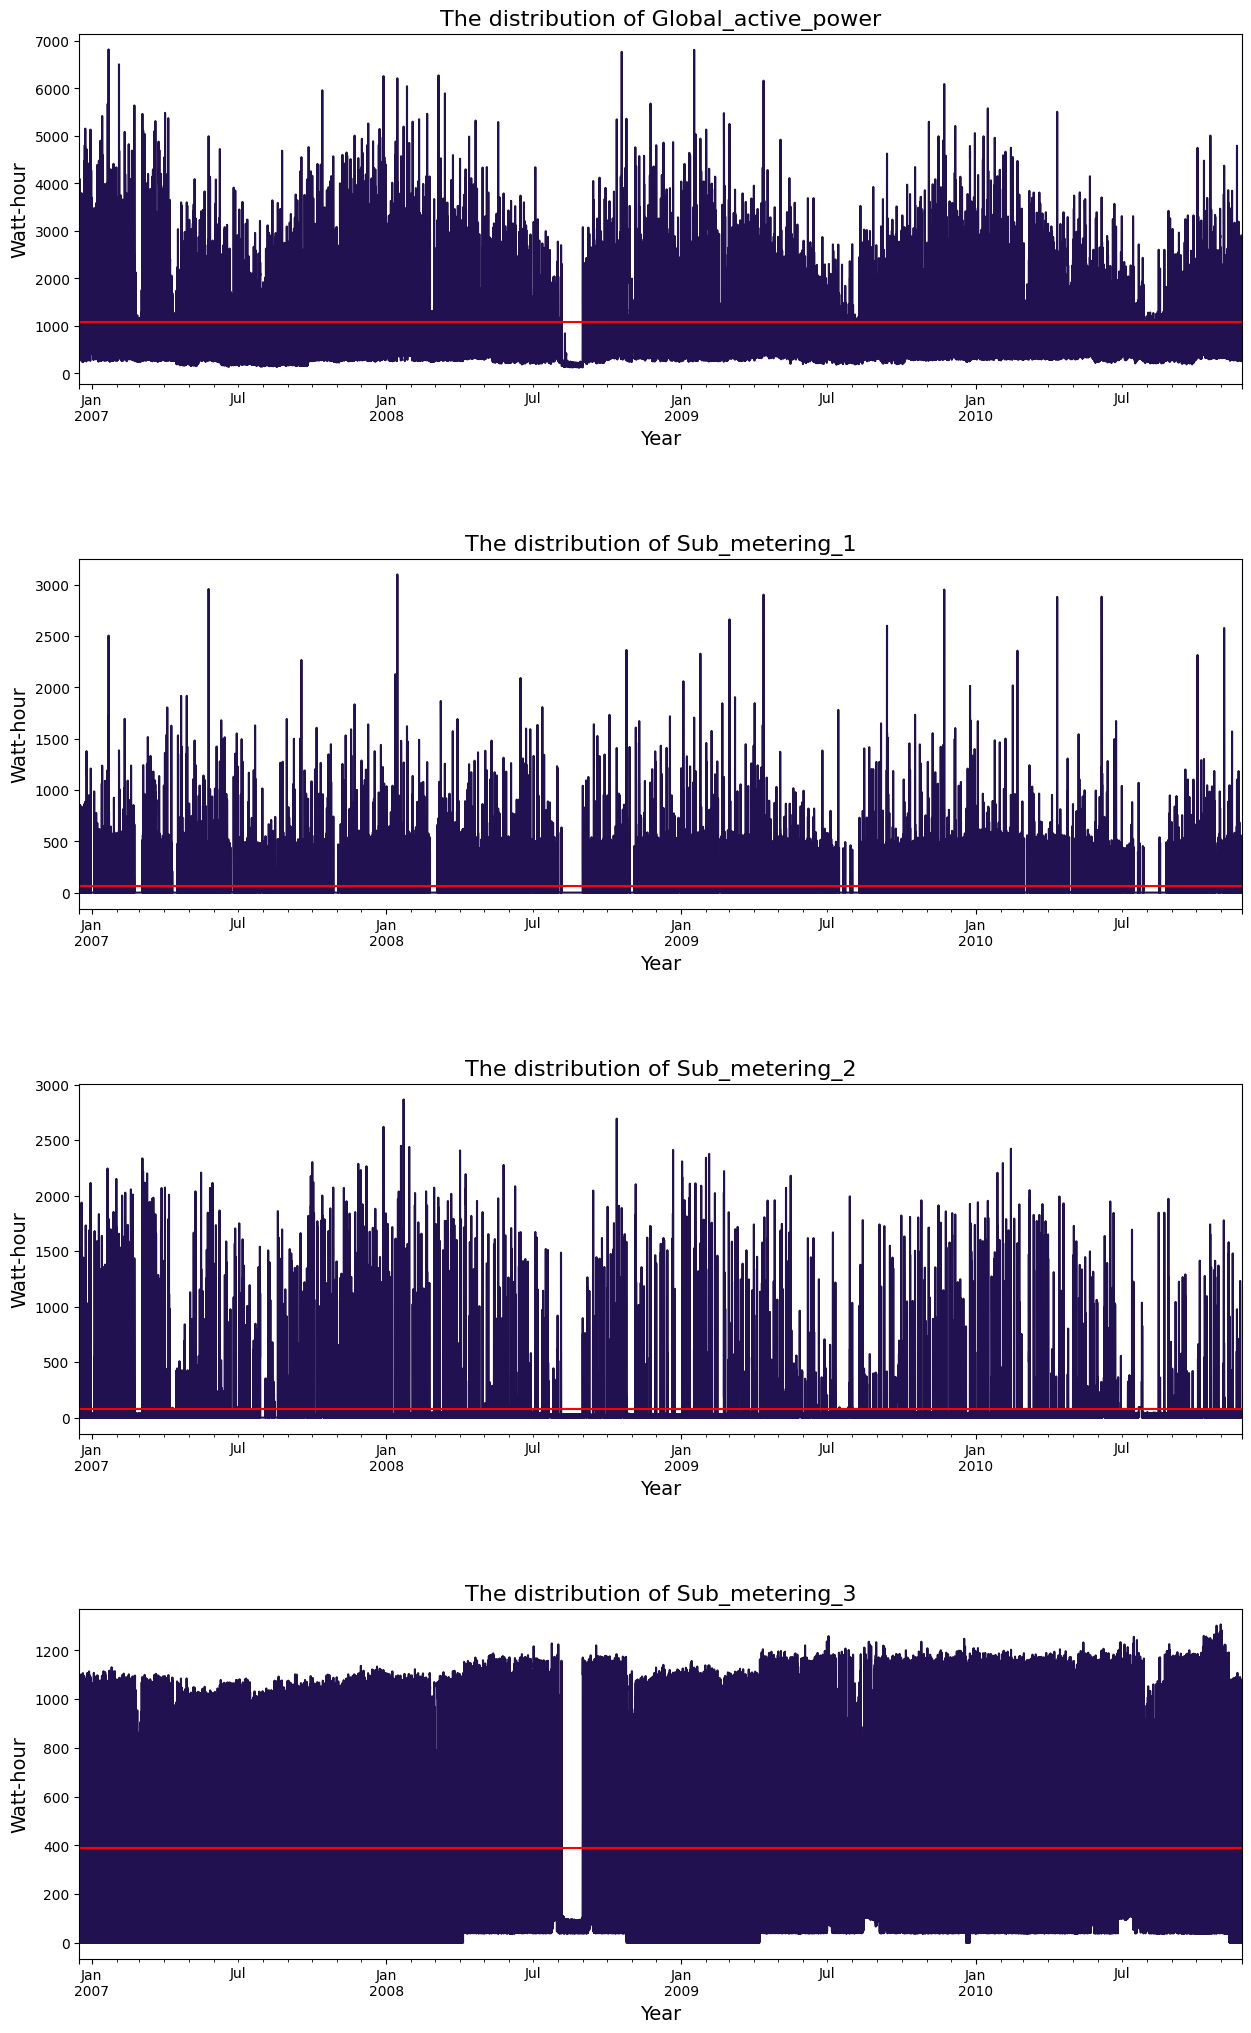

In [30]:
black_list = [columns]
feats = get_quant_features2(df_group2, black_list)

i = 1

sns.set_palette("magma")
plt.figure(figsize=(15, 25))
for x in feats:
    ax = plt.subplot(len(feats), 1, i)
    df_group2[x].plot()
    ax.set_title(f"The distribution of {x}", fontsize=16)
    ax.set_ylabel('Watt-hour', fontsize=14)
    ax.set_xlabel('Year', fontsize=14)
    plt.subplots_adjust(hspace=0.5)
    plt.axhline(df_group2[x].mean(), color="red")
    i += 1
plt.show()

## Histograms of global active power

In [31]:
def draw_histograms(df, lista, n_rows, n_cols, lista2):
    sns.set_palette("magma")
    fig = plt.figure(figsize=(16, 8))
    for i, j in enumerate(lista):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[j].hist(bins=50, ax=ax)
        ax.set_title(j)
        ax.set_title(f"Histogram of {lista2[i]}", fontsize=14)
        ax.set_xlabel("Watt-hour", fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
    fig.tight_layout()
    plt.show()

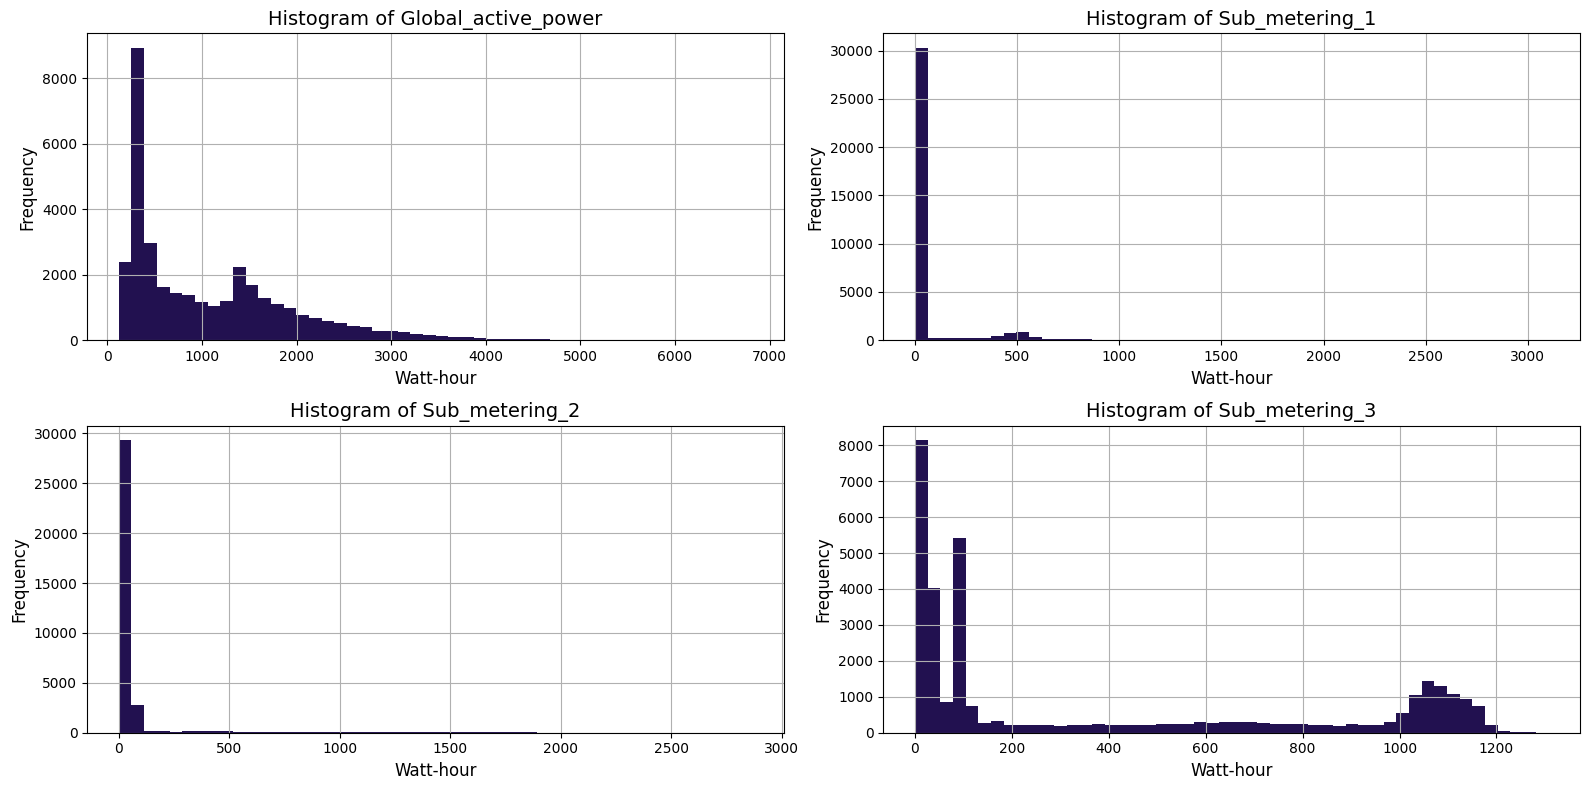

In [32]:
columns = [
    "Global_active_power",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3",
]
draw_histograms(df_group2, columns, 2, 2, columns)

## Mean watt - hour for sub metrings

In [33]:
def draw_bar(df, lista,n_row,n_col, lista2):
        fig = plt.figure(figsize=(16, 8))
        for i, j in enumerate(lista):        
            ax = fig.add_subplot(n_row,n_col,i+1)
            sns.set_palette("muted")
            df.groupby(j).mean().plot(kind="bar", xlabel=lista2[i], ylabel="Watt/hour", title=f"Mean watt-hour ({lista2[i]})", ax=ax)
        fig.tight_layout()
        plt.show()

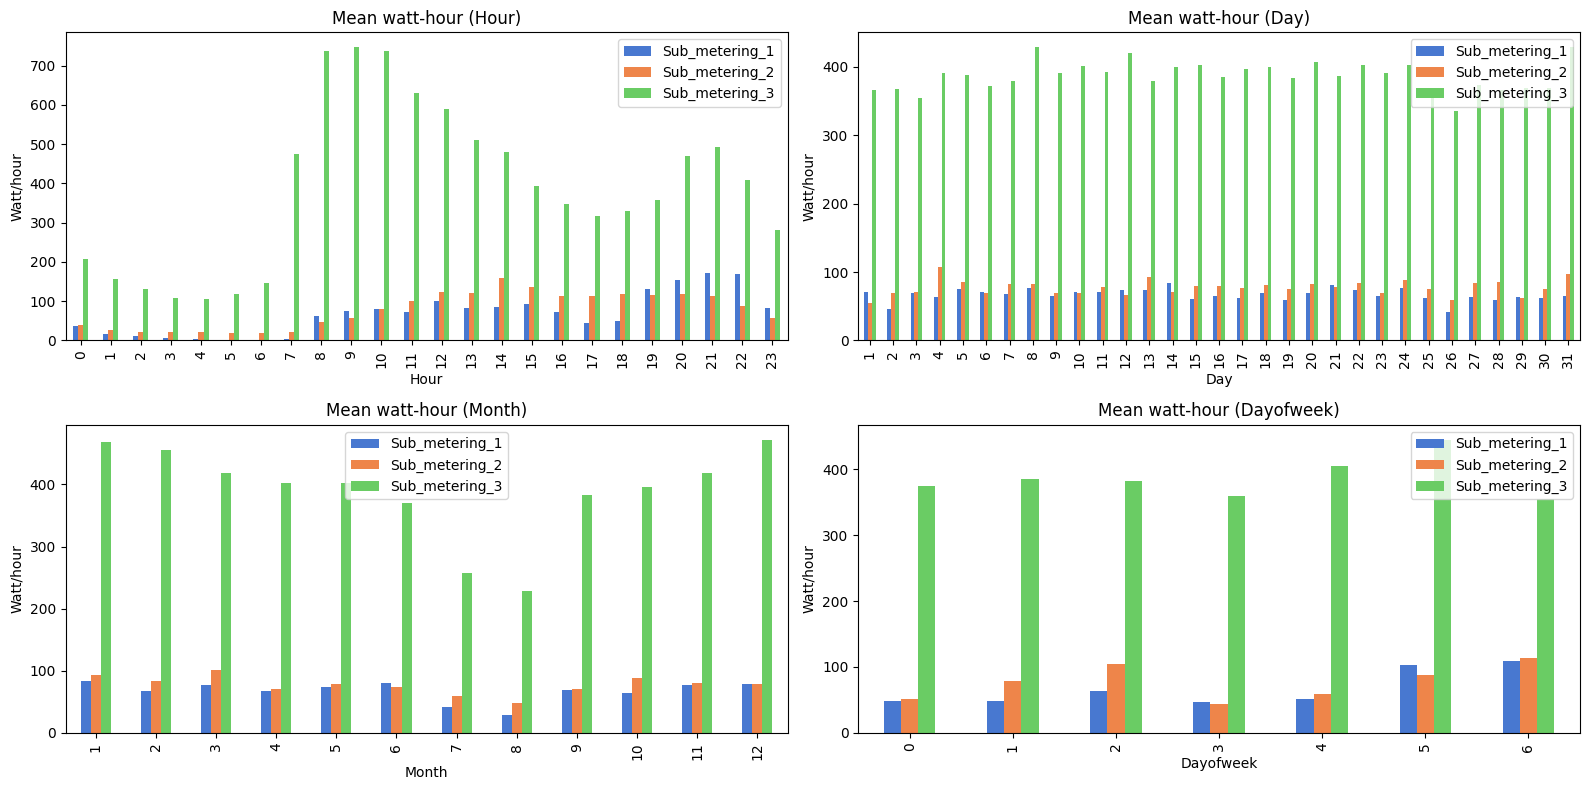

In [34]:
observation = df_group2[df_group2.index.year != 2006] [
    [
        "Sub_metering_1",
        "Sub_metering_2",
        "Sub_metering_3"
    ]
]

lista1 = [observation.index.hour,observation.index.day,observation.index.month,observation.index.dayofweek]
lista2 = ["Hour", "Day", "Month", "Dayofweek"]
lista3 = ['Sub metrings', 'Sub metrings', 'Sub metrings','Global active power']
draw_bar(observation, lista1, 2, 2, lista2)

## Mean watt-hour for global active power

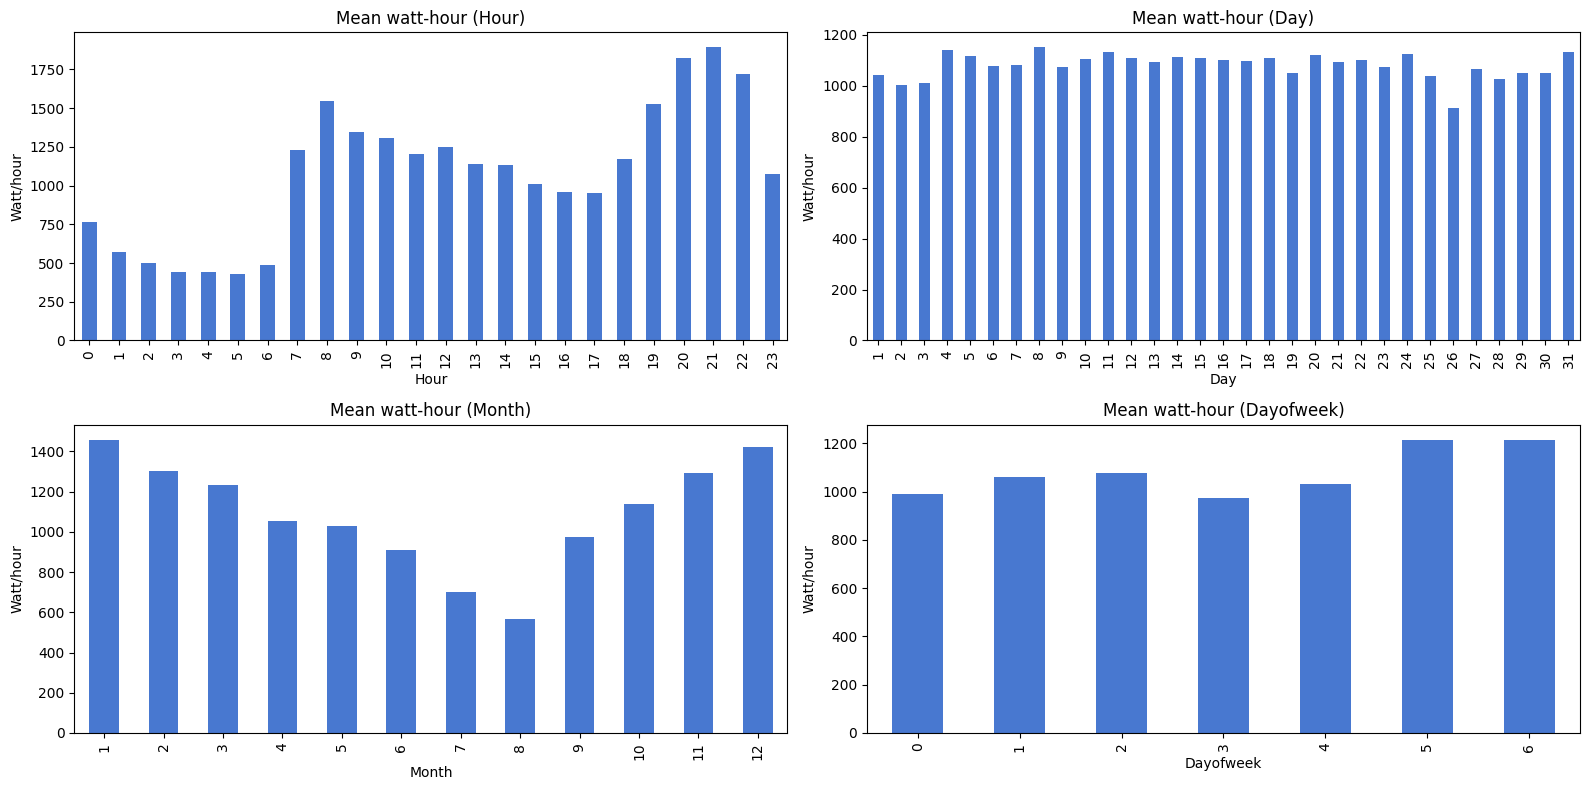

In [35]:
observation2 = df_group2[df_group2.index.year != 2006]["Global_active_power"]
lista4 = [observation2.index.hour,observation2.index.day, observation2.index.month,observation2.index.dayofweek]
lista5 = ["Hour", "Day", "Month", "Dayofweek"]

draw_bar(observation2, lista4, 2, 2, lista5);

## Boxplots for global active power

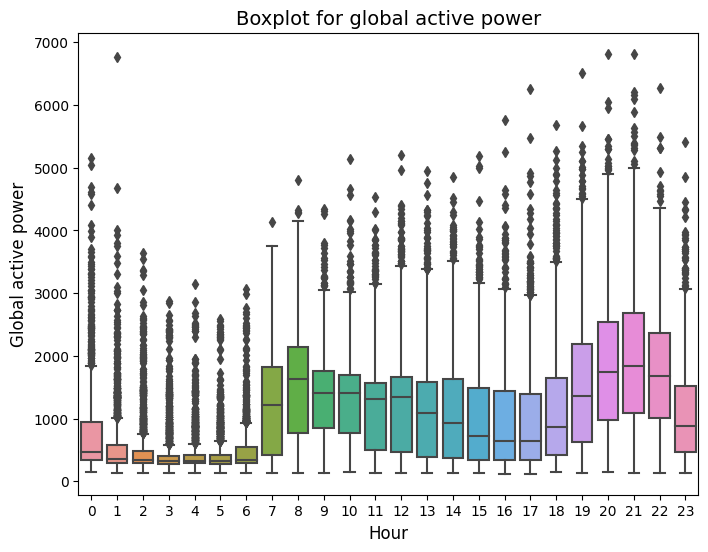

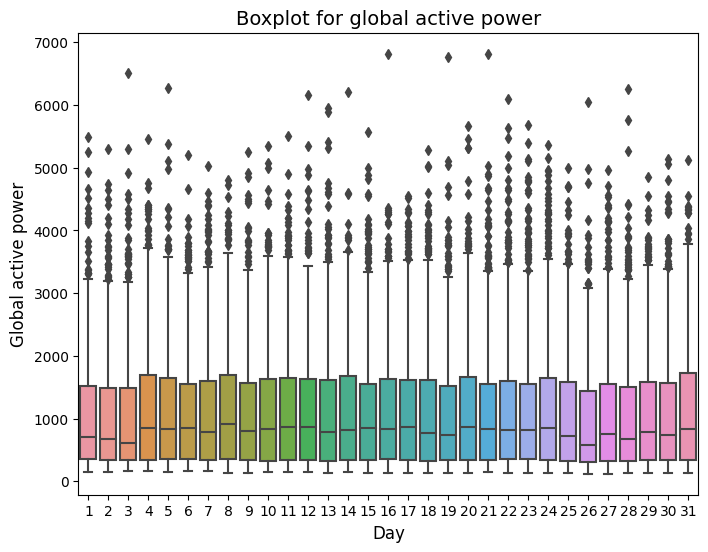

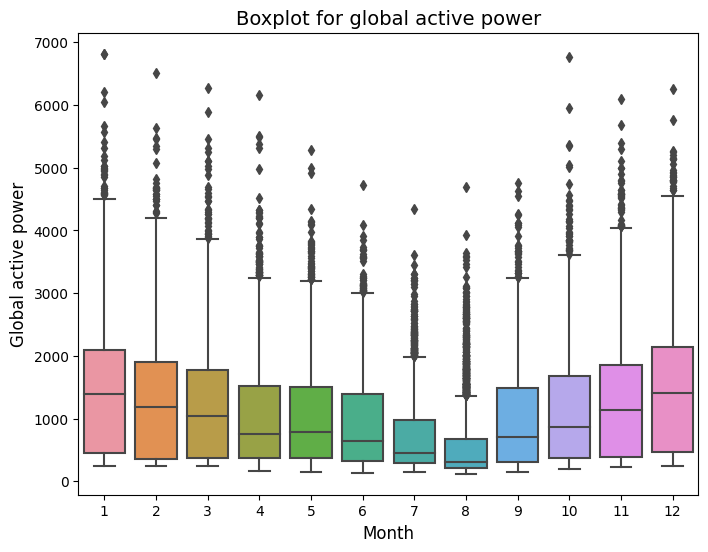

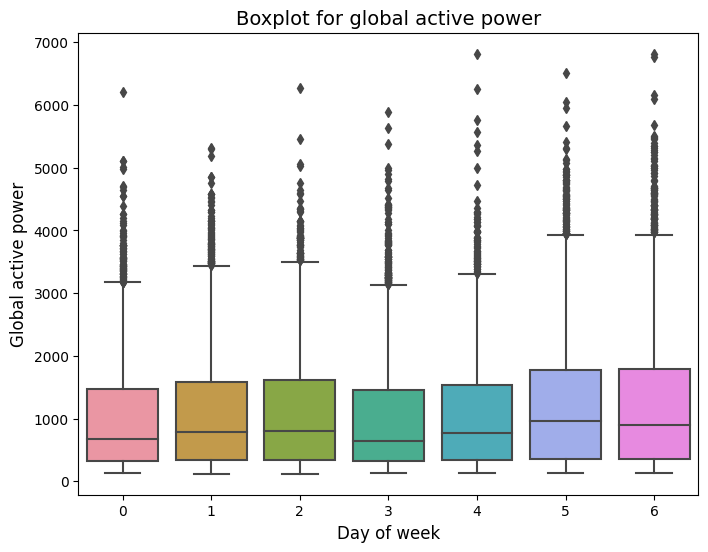

In [36]:
sns.set_palette('magma')
observation3 = df_group2["Global_active_power"]
lista6 = [observation3.index.hour, observation3.index.day, observation3.index.month, observation3.index.dayofweek]
lista7 = ["Hour", "Day", "Month", "Day of week"]
for i, d in enumerate(lista6):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_group2, x=d, y="Global_active_power")
    plt.title("Boxplot for global active power", fontsize=14)
    plt.ylabel("Global active power", fontsize=12)
    plt.xlabel(lista7[i], fontsize=12)
    plt.show()

## Seasonal distribution of the time series

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

stat = seasonal_decompose(df_group2['Global_active_power'], model='additive')
stat2 = seasonal_decompose(df_group2['Sub_metering_1'], model='additive')
stat3 = seasonal_decompose(df_group2['Sub_metering_2'], model='additive')
stat4 = seasonal_decompose(df_group2['Sub_metering_3'], model='additive')

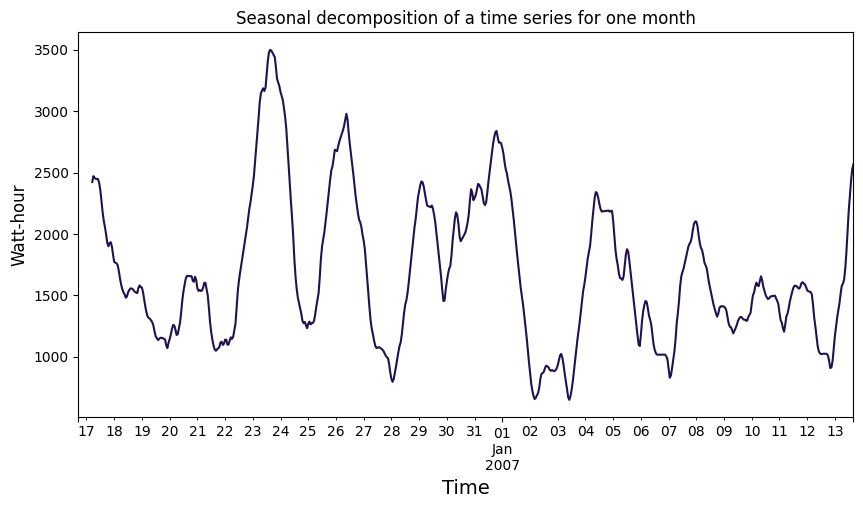

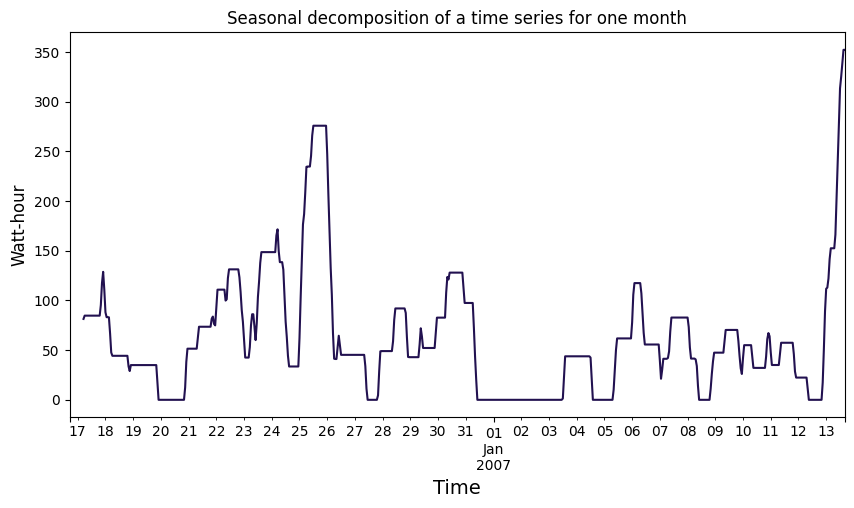

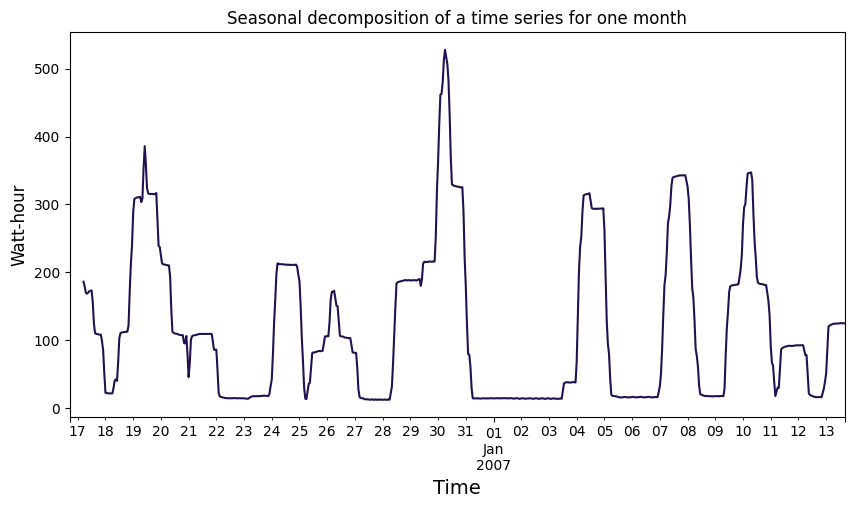

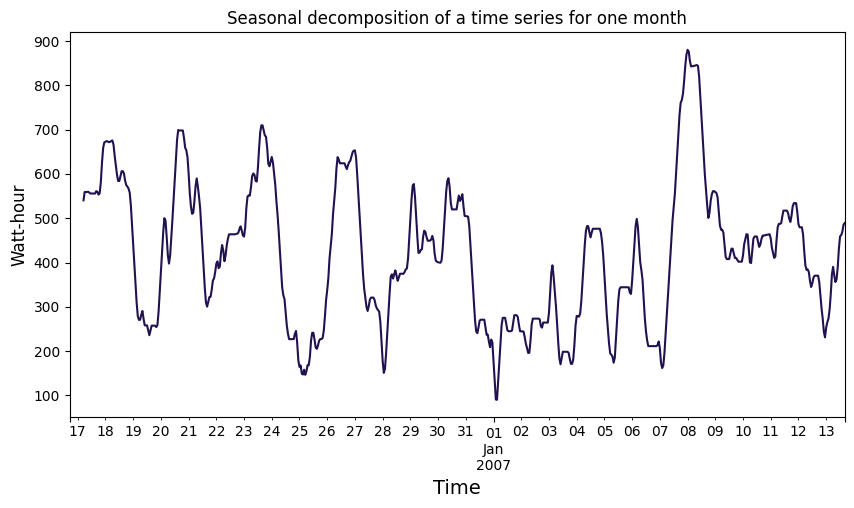

In [38]:
list_stat = [stat, stat2, stat3, stat4]
for s in list_stat:
    s.trend.iloc[:672].plot(figsize=(10, 5))
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Watt-hour", fontsize=12)
    plt.title("Seasonal decomposition of a time series for one month", fontsize=12)
    plt.show()

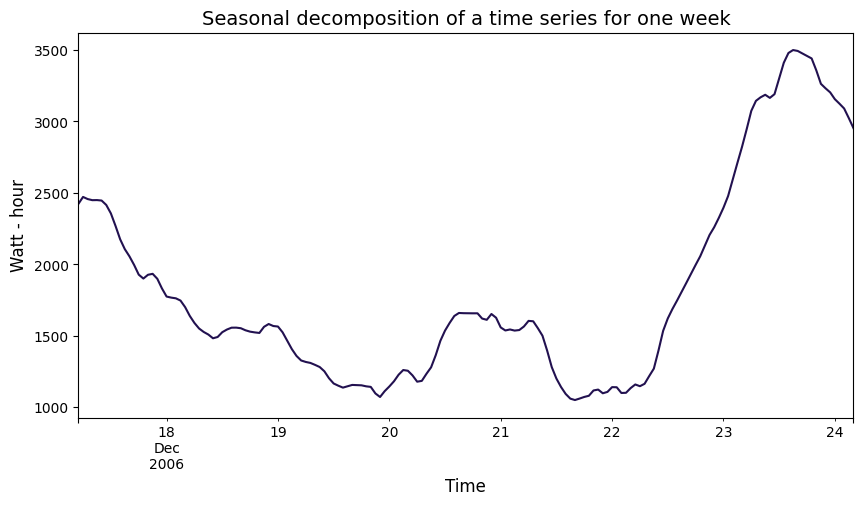

In [39]:
stat.trend[12:180].plot(figsize=(10, 5))
plt.xlabel("Time", fontsize=12)
plt.ylabel("Watt - hour", fontsize=12)
plt.title("Seasonal decomposition of a time series for one week", fontsize=14)
plt.show()

In [40]:
# Multivariate Analysis

In [41]:
## Features 

In [42]:
seasons = [
    1,
    1,
    2,
    2,
    2,
    3,
    3,
    3,
    4,
    4,
    4,
    1,
]

month_to_season = dict(zip(range(1, 13), seasons))

In [43]:
df_group2["hour"] = df_group2.index.hour
df_group2["dayofweek"] = df_group2.index.dayofweek
df_group2["month"] = df_group2.index.month
df_group2["quarter"] = df_group2.index.quarter
df_group2["week"] = df_group2.index.isocalendar().week.astype('int64')
df_group2["season"] = df_group2["month"].map(month_to_season)
df_group2["weekend"] = (df_group2.index.dayofweek > 4).astype(int)
df_group2["energy_rest"] = np.array(df_group2.Global_active_power) - ( np.array(df_group2.Sub_metering_1) + np.array(df_group2.Sub_metering_2) + np.array(df_group2.Sub_metering_3))

def part_of_day(hour):
    if 6 <= hour <= 9:
        return 0 # morning
    elif 19 <= hour <= 23:
        return 1 # evening
    else:
        return None
    
df_group2['evening_or_morning'] = df_group2.index.hour.map(part_of_day)

df_group2['Global_active_power_6hrs_lag_std'] = df_group2['Global_active_power'].rolling(window = 6).std()
df_group2['Global_active_power_8hrs_lag_std'] = df_group2['Global_active_power'].rolling(window = 8).std()
df_group2['Global_active_power_16hrs_lag_std'] = df_group2['Global_active_power'].rolling(window = 16).std()
df_group2['Global_active_power_24hrs_lag_std'] = df_group2['Global_active_power'].rolling(window = 24).std()
df_group2['Global_active_power_48hrs_lag_std'] = df_group2['Global_active_power'].rolling(window = 48).std()

df_group2['Global_active_power_6hrs_lag_max'] = df_group2['Global_active_power'].rolling(window = 6).max()
df_group2['Global_active_power_8hrs_lag_max'] = df_group2['Global_active_power'].rolling(window = 8).max()
df_group2['Global_active_power_16hrs_lag_max'] = df_group2['Global_active_power'].rolling(window = 16).max()
df_group2['Global_active_power_24hrs_lag_max'] = df_group2['Global_active_power'].rolling(window = 24).max()
df_group2['Global_active_power_48hrs_lag_max'] = df_group2['Global_active_power'].rolling(window = 48).max()

df_group2['Global_active_power_6hrs_lag_min'] = df_group2['Global_active_power'].rolling(window = 6).min()
df_group2['Global_active_power_8hrs_lag_min'] = df_group2['Global_active_power'].rolling(window = 8).min()
df_group2['Global_active_power_16hrs_lag_min'] = df_group2['Global_active_power'].rolling(window = 16).min()
df_group2['Global_active_power_24hrs_lag_min'] = df_group2['Global_active_power'].rolling(window = 24).min()
df_group2['Global_active_power_48hrs_lag_min'] = df_group2['Global_active_power'].rolling(window = 48).min()

df_group2['Global_active_power_6hrs_lag_mean'] = df_group2['Global_active_power'].rolling(window = 6).mean()
df_group2['Global_active_power_8hrs_lag_mean'] = df_group2['Global_active_power'].rolling(window = 8).mean()
df_group2['Global_active_power_16hrs_lag_mean'] = df_group2['Global_active_power'].rolling(window = 16).mean()
df_group2['Global_active_power_24hrs_lag_mean'] = df_group2['Global_active_power'].rolling(window = 24).mean()
df_group2['Global_active_power_48hrs_lag_mean'] = df_group2['Global_active_power'].rolling(window = 48).mean()


## Correlation

In [44]:
pearson = df.corr(method='pearson', numeric_only=True)
pearson_all = df_group2.corr(method='pearson', numeric_only=True)

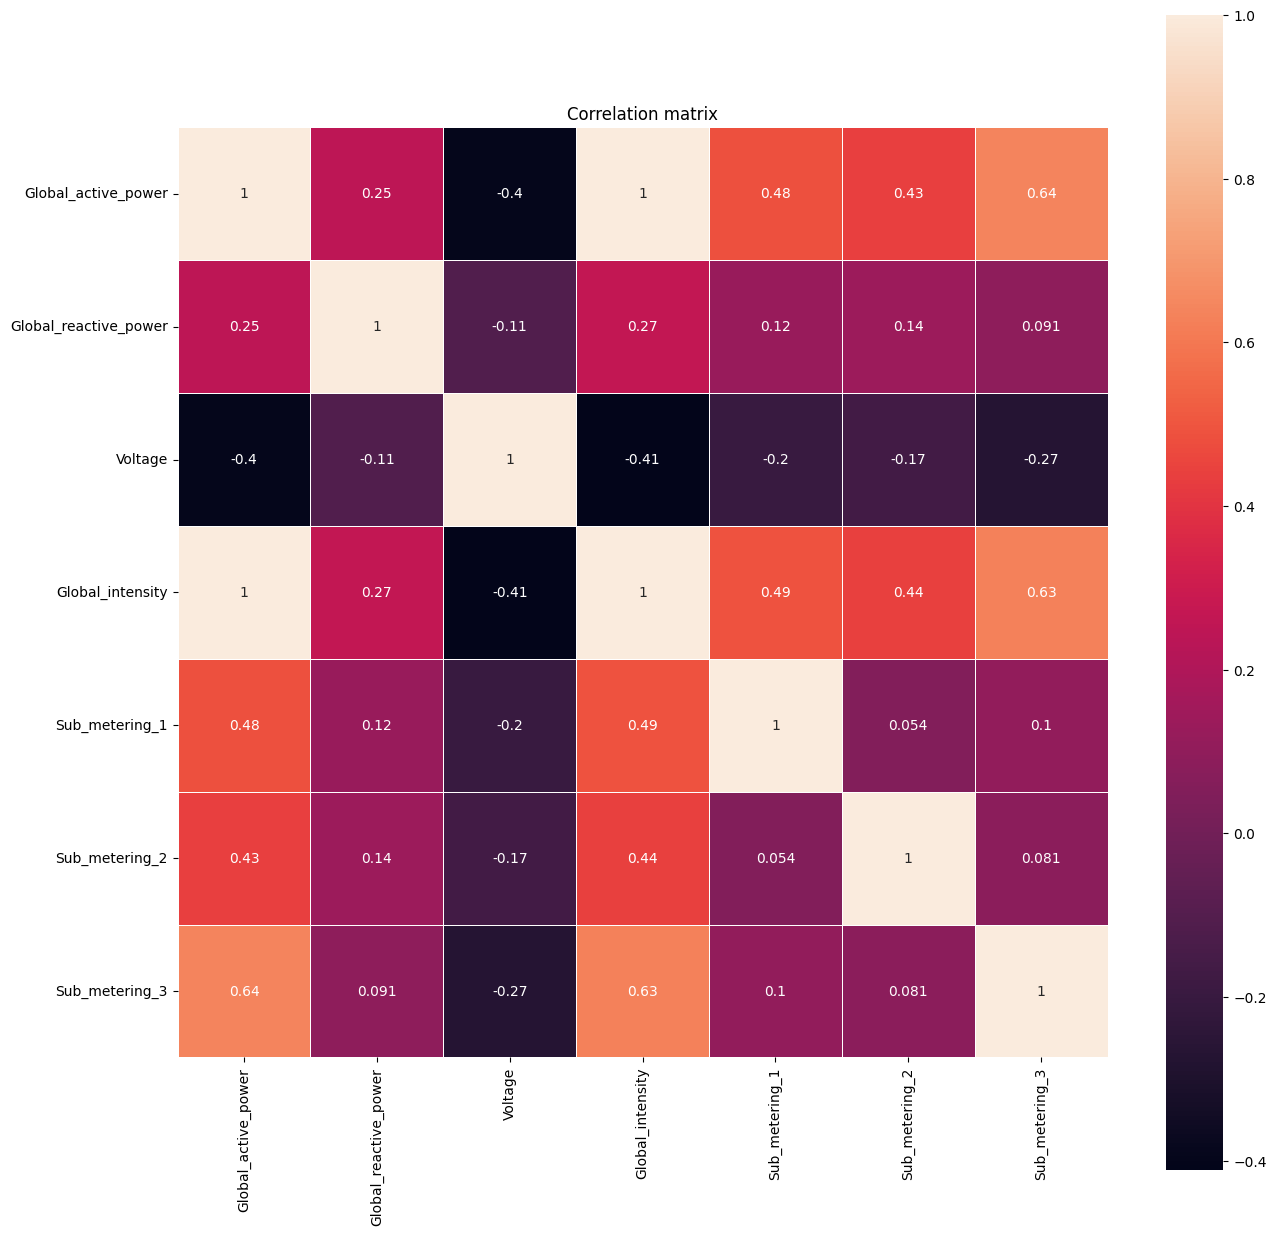

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pearson,annot=True,robust =True, linewidth=.5,square=True)
plt.title("Correlation matrix");

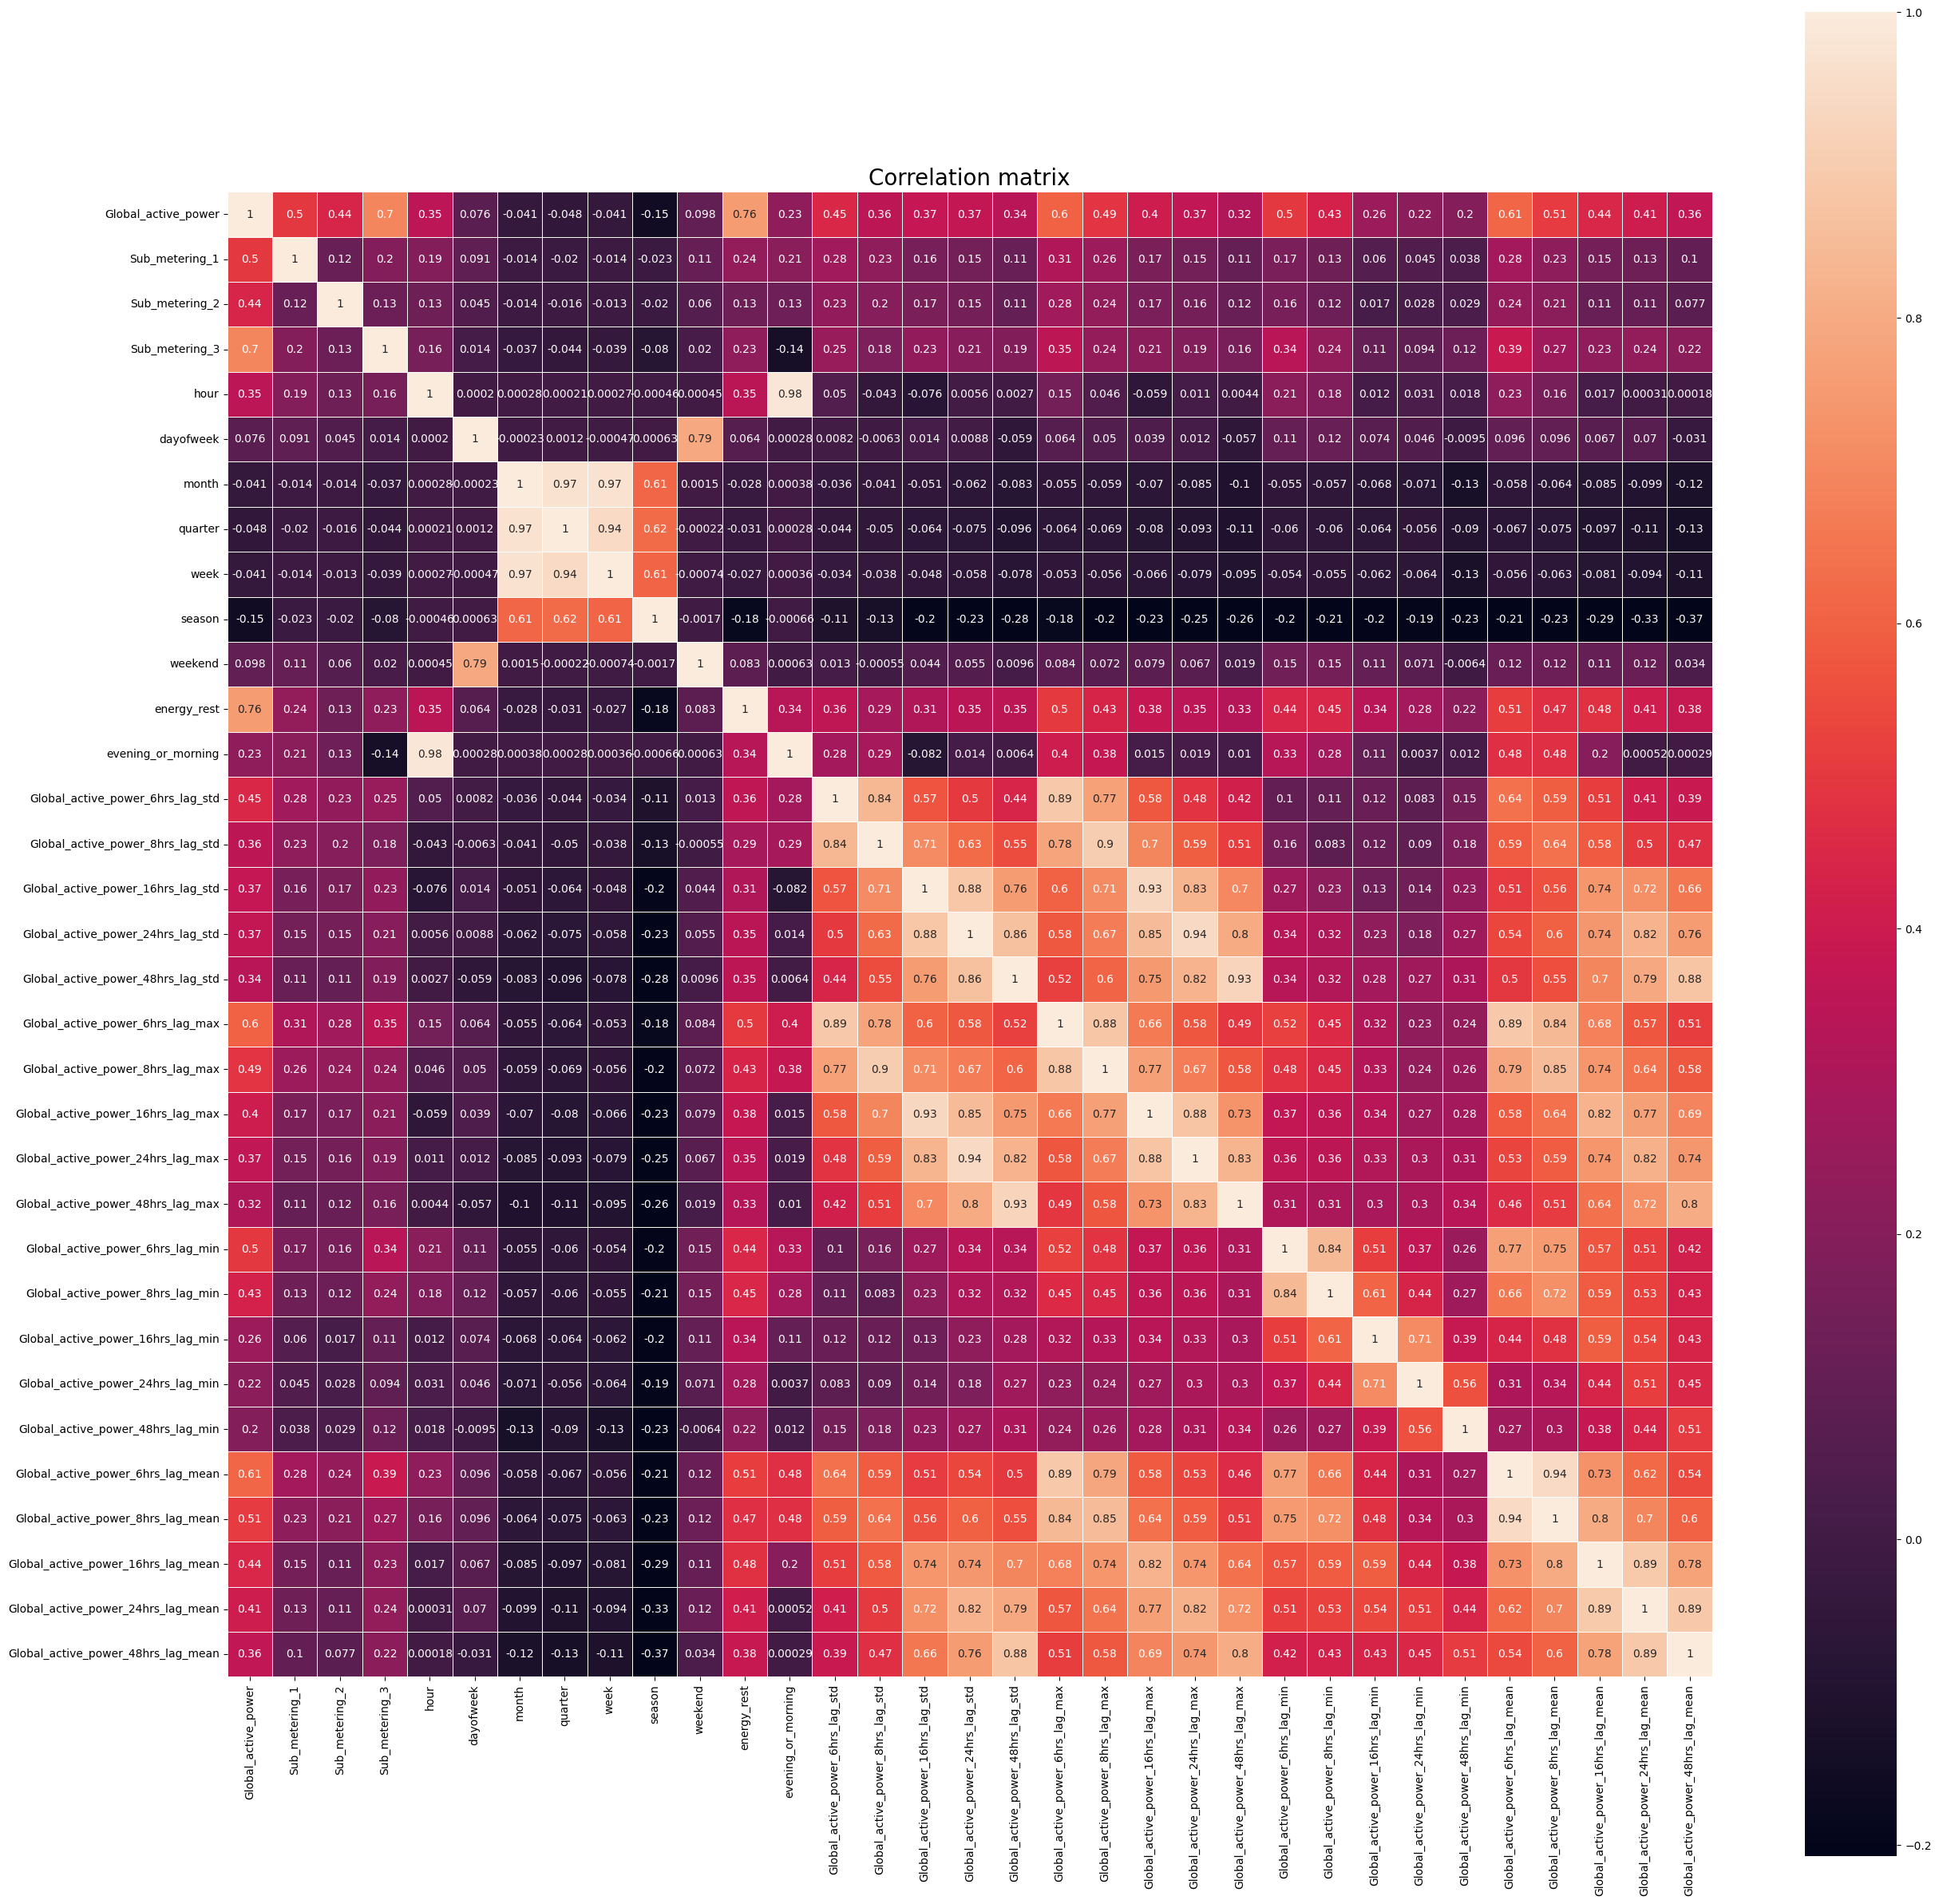

In [46]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(pearson_all,annot=True, robust =True, linewidth=.5,square=True)
plt.title("Correlation matrix", fontsize=20);

# XGBoost model

In [47]:
## Predictions for Global active power

In [48]:
columns = ["Global_active_power", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]

In [49]:
n = int(len(df_group2.sort_values(by="timestamp")) * 0.75)

In [50]:
df_75 = df_group2.sort_values(by="timestamp")[:n]

In [51]:
df_25 = df_group2.sort_values(by="timestamp")[n:]

## Training and predicting

In [52]:
X_train = df_75.drop(labels=['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3', 'energy_rest'], axis=1).copy()
X_test = df_25.drop(labels=['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3', 'energy_rest'], axis=1).copy()
y_train = df_75[["Global_active_power"]]
y_test = df_25[["Global_active_power"]]

In [53]:
X_train.index.equals(y_train.index)

True

In [54]:
model_xgb_global = xgb.XGBRegressor(
    objective="reg:squarederror",
    base_score=0.5,
    max_depth=5,
    booster="gbtree",
    random_state=42,
    n_estimators=500,
    learning_rate=0.01,
    colsample_bytree = 0.8,
    gamma = 15

)

In [55]:
model_xgb_global.fit(
    X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100
)

[0]	validation_0-rmse:1421.31176	validation_1-rmse:1333.76574
[100]	validation_0-rmse:717.16416	validation_1-rmse:660.51186
[200]	validation_0-rmse:529.88317	validation_1-rmse:486.21605
[300]	validation_0-rmse:480.62404	validation_1-rmse:446.16839
[400]	validation_0-rmse:462.64649	validation_1-rmse:436.30670
[499]	validation_0-rmse:452.78336	validation_1-rmse:432.92582


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=15, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [56]:
y_pred = model_xgb_global.predict(X_test)

In [57]:
pred_test = model_xgb_global.score(X_test, y_test)
pred_train = model_xgb_global.score(X_train, y_train)

## Evaluation

In [58]:
print(f"Accuracy on training set: {pred_train:.2f}")
print(f"Accuracy on test set: {pred_test:.2f}")

Accuracy on training set: 0.76
Accuracy on test set: 0.71


In [59]:
print("Mean Absolute Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_pred))
print("R kwadrat: ", r2_score(y_test, y_pred))

Mean Absolute Error:  187424.76722128925
Root Mean Squared Error:  432.9258218462942
Mean Absolute Percentage Error:  0.38663799540827193
R kwadrat:  0.7106831945444314


## Feature importances

In [60]:
fi = pd.DataFrame(
    data=model_xgb_global.feature_importances_,
    index=model_xgb_global.feature_names_in_,
    columns=["importance"]
)

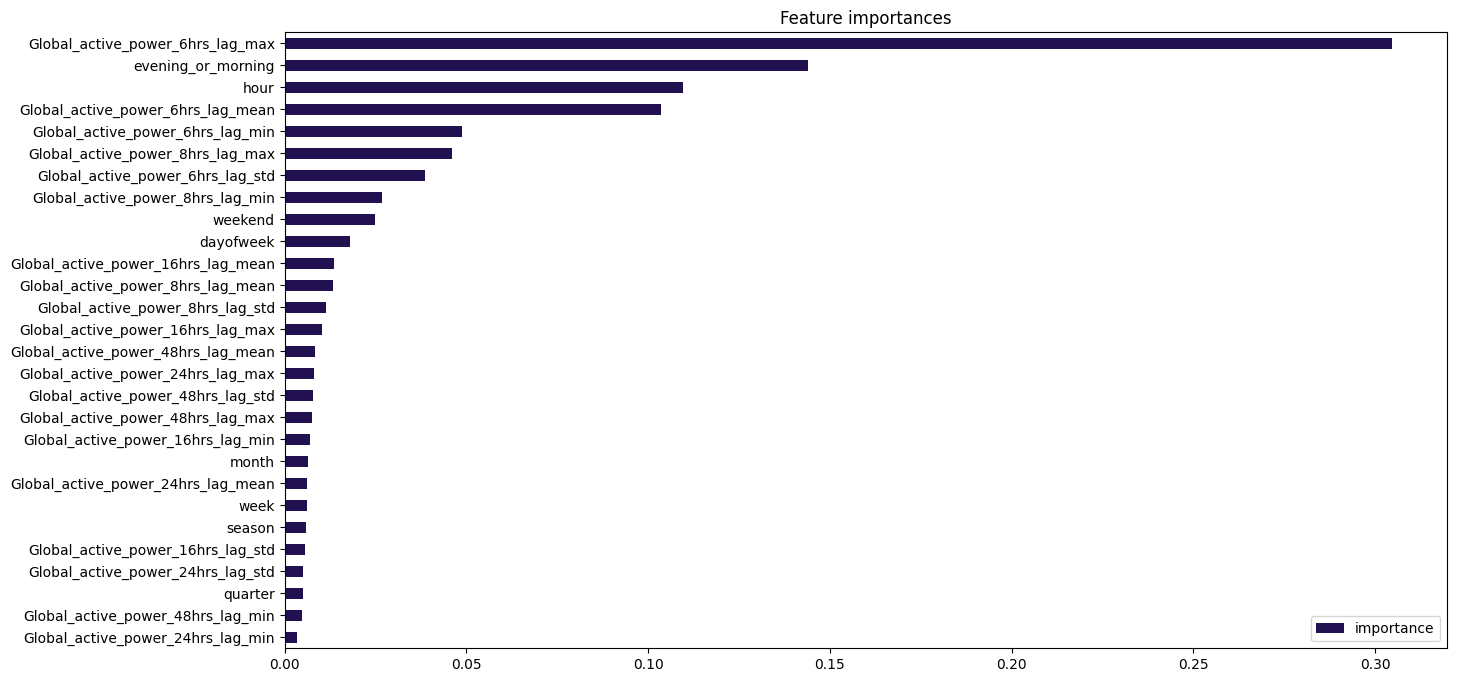

In [61]:
sns.set_palette('magma')
fi.sort_values("importance").plot(kind="barh", figsize=(15, 8))
plt.title("Feature importances");

## Observations and predictions

In [62]:
x = np.array(df_group2.index[n:])
y = np.array(df_group2[["Global_active_power"]].iloc[n:])
x_reg = x
y_reg = y_pred

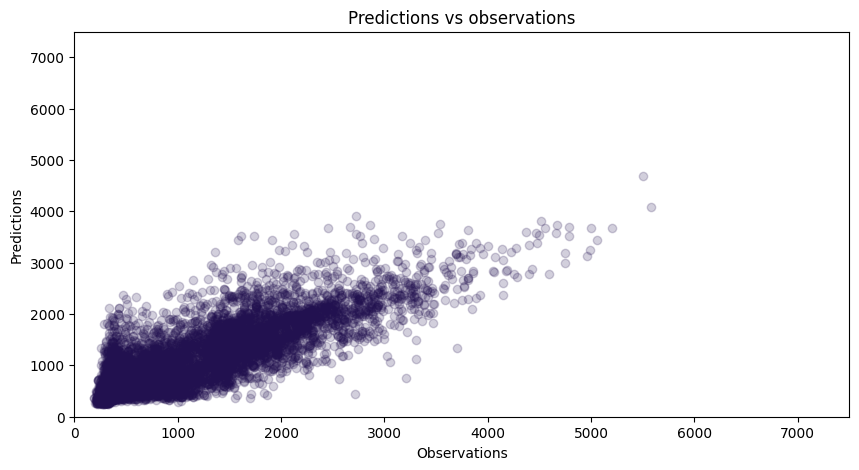

In [63]:
sns.set_palette('magma')
plt.figure(figsize=(10, 5))
plt.scatter(x=y,y=y_pred,alpha=0.2)
plt.xlim(0, 7500)
plt.ylim(0, 7500)
plt.xlabel("Observations", fontsize=10)
plt.ylabel("Predictions", fontsize=10)
plt.title("Predictions vs observations", fontsize=12)
plt.show()

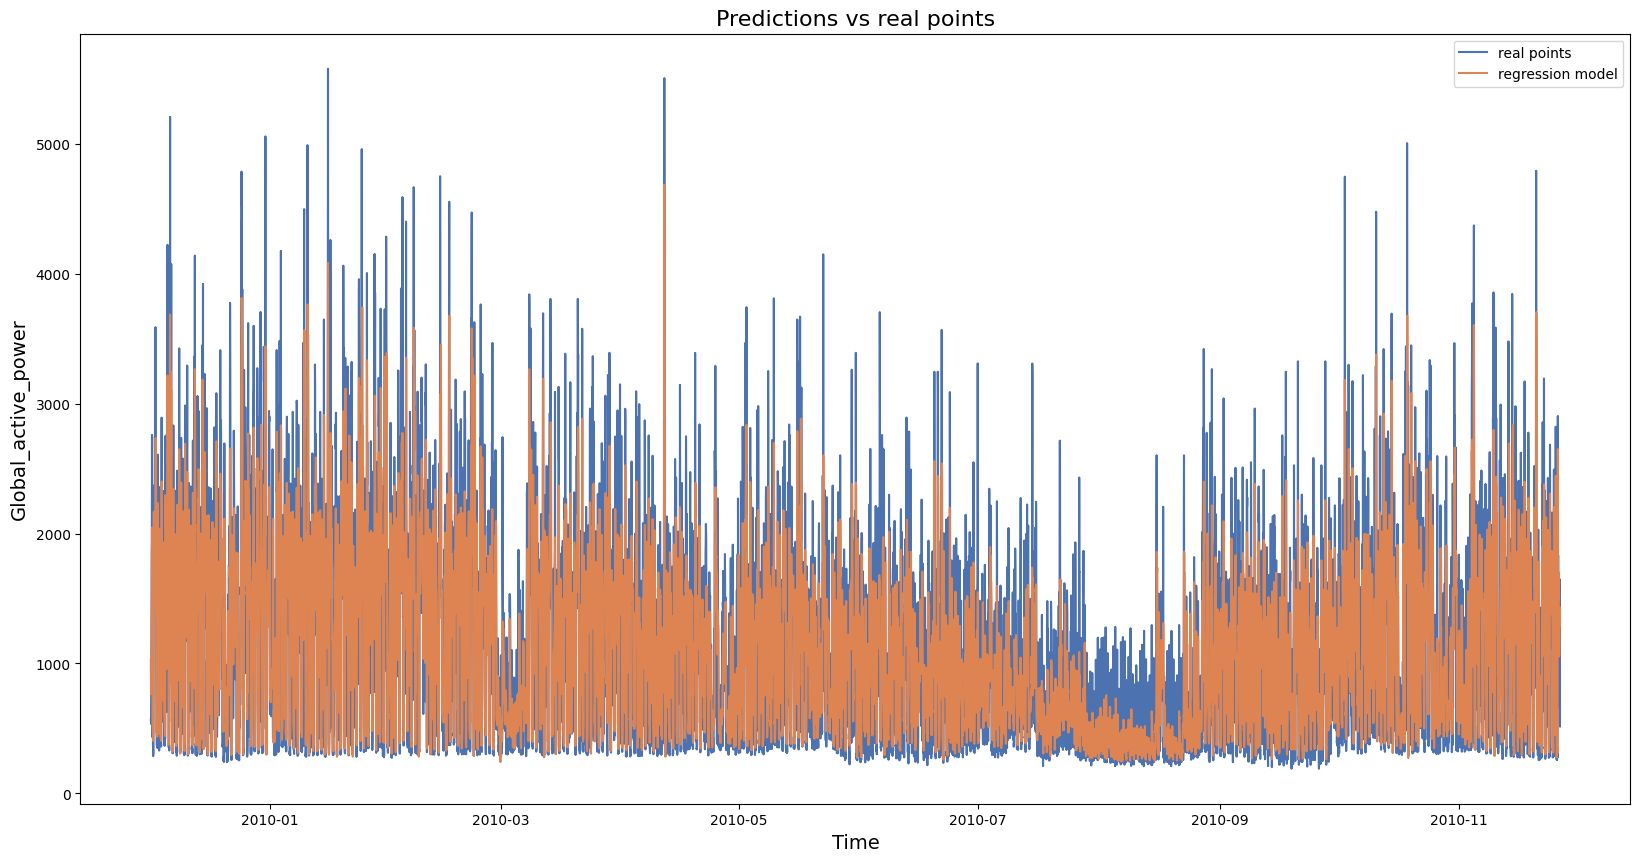

In [64]:
sns.set_palette('deep')
fig = plt.figure(figsize=(20, 10))
plt.plot(x, y, label="real points")
plt.plot(x_reg, y_reg, label="regression model")
plt.legend()
plt.title("Predictions vs real points", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Global_active_power", fontsize=14);

# Prediction of the future based on the average of the past 3 years

In [65]:
future = pd.DataFrame(index=pd.date_range('2010-12-26', periods=8760, freq='H'))

In [66]:
gap_2007 = df_group2[df_group2.index.year == 2007][['Global_active_power']]
gap_2008 = df_group2[df_group2.index.year == 2008][['Global_active_power']].reset_index()
gap_2009 = df_group2[df_group2.index.year == 2009][['Global_active_power']]

In [67]:
gap_2008 = gap_2008.drop(index= range(1416,1440),axis=0)

In [68]:
future['Global_active_power_f'] = (np.array(gap_2007['Global_active_power'])+np.array(gap_2008['Global_active_power'])+np.array(gap_2009['Global_active_power']))/3

In [69]:
future["hour"] = future.index.hour
future["dayofweek"] = future.index.dayofweek
future["month"] = future.index.month
future["quarter"] = future.index.quarter
future["week"] = future.index.isocalendar().week.astype('int64')
future["season"] = future["month"].map(month_to_season)
future["weekend"] = (future.index.dayofweek > 4).astype(int)

def part_of_day(hour):
    if 6 <= hour <= 9:
        return 0 # morning
    elif 19 <= hour <= 23:
        return 1 # evening
    else:
        return None

future['evening_or_morning'] = future.index.hour.map(part_of_day)

future['Global_active_power_6hrs_lag_std'] = future['Global_active_power_f'].rolling(window = 6).std()
future['Global_active_power_8hrs_lag_std'] = future['Global_active_power_f'].rolling(window = 8).std()
future['Global_active_power_16hrs_lag_std'] = future['Global_active_power_f'].rolling(window = 16).std()
future['Global_active_power_24hrs_lag_std'] = future['Global_active_power_f'].rolling(window = 24).std()
future['Global_active_power_48hrs_lag_std'] = future['Global_active_power_f'].rolling(window = 48).std()
future['Global_active_power_6hrs_lag_max'] = future['Global_active_power_f'].rolling(window = 6).max()
future['Global_active_power_8hrs_lag_max'] = future['Global_active_power_f'].rolling(window = 8).max()
future['Global_active_power_16hrs_lag_max'] = future['Global_active_power_f'].rolling(window = 16).max()
future['Global_active_power_24hrs_lag_max'] = future['Global_active_power_f'].rolling(window = 24).max()
future['Global_active_power_48hrs_lag_max'] = future['Global_active_power_f'].rolling(window = 48).max()
future['Global_active_power_6hrs_lag_min'] = future['Global_active_power_f'].rolling(window = 6).min()
future['Global_active_power_8hrs_lag_min'] = future['Global_active_power_f'].rolling(window = 8).min()
future['Global_active_power_16hrs_lag_min'] = future['Global_active_power_f'].rolling(window = 16).min()
future['Global_active_power_24hrs_lag_min'] = future['Global_active_power_f'].rolling(window = 24).min()
future['Global_active_power_48hrs_lag_min'] = future['Global_active_power_f'].rolling(window = 48).min()
future['Global_active_power_6hrs_lag_mean'] = future['Global_active_power_f'].rolling(window = 6).mean()
future['Global_active_power_8hrs_lag_mean'] = future['Global_active_power_f'].rolling(window = 8).mean()
future['Global_active_power_16hrs_lag_mean'] = future['Global_active_power_f'].rolling(window = 16).mean()
future['Global_active_power_24hrs_lag_mean'] = future['Global_active_power_f'].rolling(window = 24).mean()
future['Global_active_power_48hrs_lag_mean'] = future['Global_active_power_f'].rolling(window = 48).mean()

In [70]:
future_pred = future.drop(labels= 'Global_active_power_f',axis=1)

In [71]:
y_f = model_xgb_global.predict(future_pred.values)

In [72]:
x = np.array(df_group2.index[:])
y = np.array(df_group2[["Global_active_power"]].iloc[:])
x_reg = np.array(df_group2.index[n:])
y_reg = y_pred
x_fu = np.array(future_pred.index)
y_fu = y_f

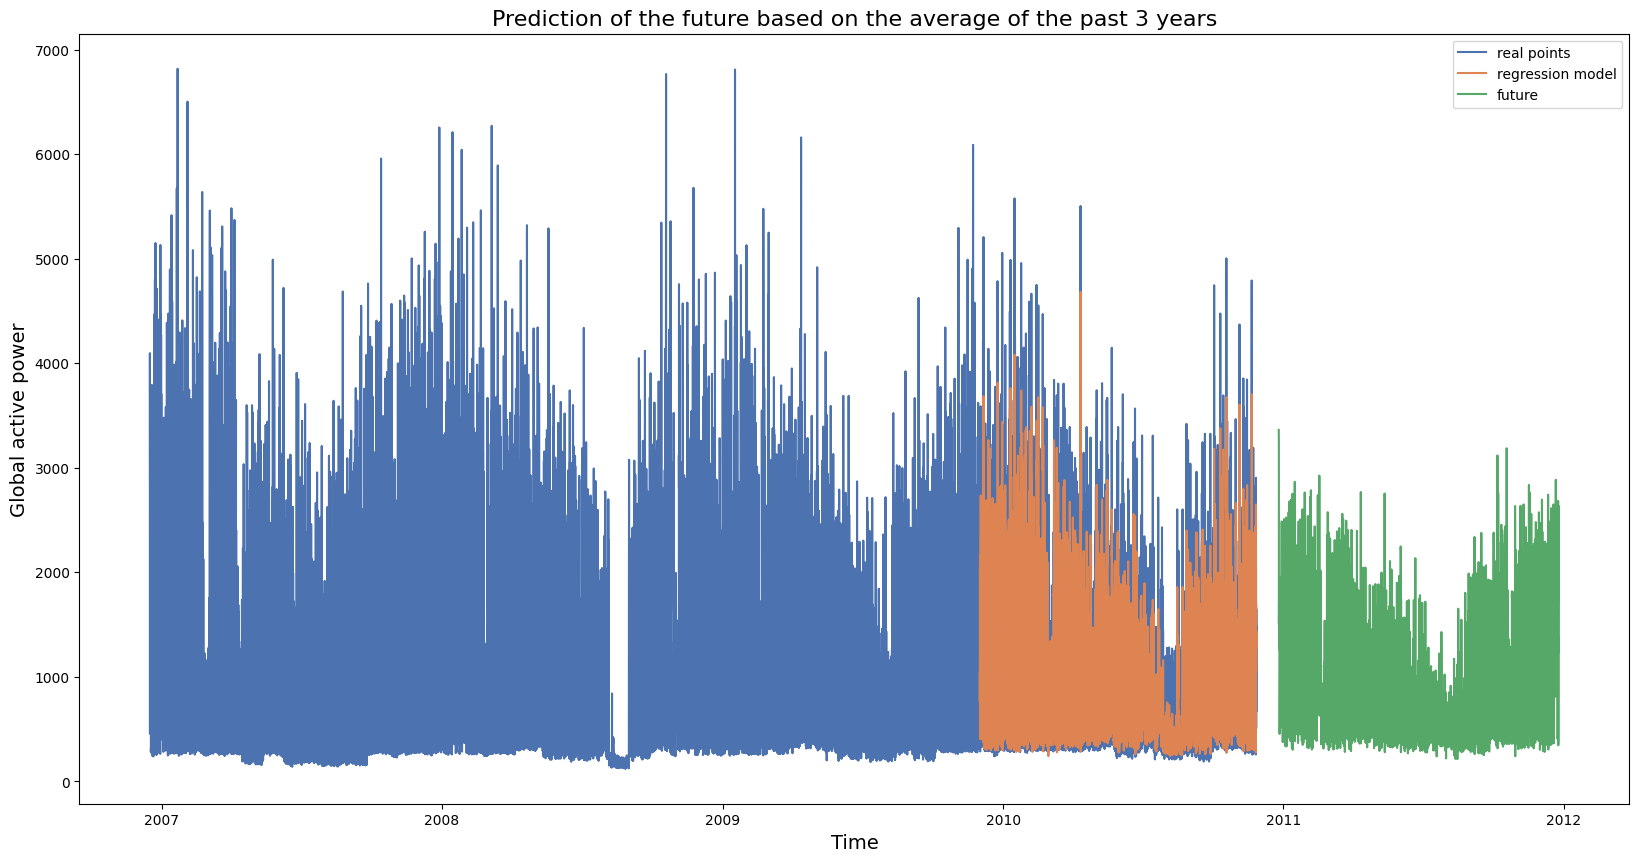

In [73]:
sns.set_palette('deep')
fig = plt.figure(figsize=(20, 10))
plt.plot(x, y, label="real points")
plt.plot(x_reg, y_reg, label="regression model")
plt.plot(x_fu, y_fu, label="future")
plt.legend()
plt.title("Prediction of the future based on the average of the past 3 years", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Global active power", fontsize=14);

# Conclusions

This performance of a model, where the test results are 0.71 and the training results are 0.76, is a promising sign. <br><br>It suggests that the model has a reasonable ability to generalize to new data and could potentially achieve even better results with further optimization, such as fine-tuning and expanding its feature set.